<a href="https://colab.research.google.com/github/nikhila3100/nikhila_info5502_spring2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (02/24/2022, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (15 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1) Start by choosing a question you'd like a visualization to answer.

(2) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [ ]:
# Your answer here (question + explanation):

Visualize the total no.of people born in the year 1999-2000 according to their age groups.





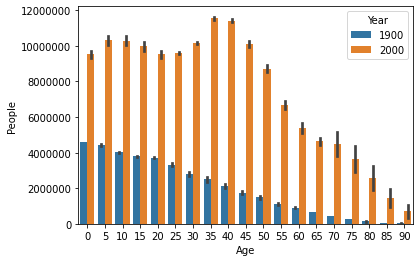

In [7]:
# Your answer here (python code + explanation):
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns

dt = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_census.csv", sep=",")
sns.barplot(data=dt, x='Age', y='People', hue='Year')
mplt.ticklabel_format(style='plain', axis='y')
mplt.show()





Question 2 (20 points). In this question, you are required to use visualizations to tell a story about a dataset.

Step 1. Pick a domain and data set that you are interested in.

Peruse the provided data sets: http://nixdell.com/classes/HCI-and-Design-Spring-2016/Resources.html.

Choose the one of greatest interest to you. If you would like to explore a different data set, you are free to do so but be aware of how much work might be needed to clean the data and get it into a usable format.

Step 2. Explore the data. Find a story. Ask questions.

Start by asking questions. For example: Is there a relationship between melting point and atomic number? Are the brightness and color of stars correlated? Are there different patterns of nucleotides in different regions in human DNA?

Step 3. Assess the fitness of the data for answering your question.

Inspect the data -- it is invariably helpful to first look at the raw values. Does the data seem appropriate for answering your question? If not, you may need to start the process over. If so, does the data need to be reformatted or cleaned prior to analysis? Perform any steps necessary to get the data into shape prior to visual analysis.

Step 4. Create the visualization(s) that tell a story about the data.

You will likely need to create several and see what works best. Keep a record of things you tried and discarded.


In [ ]:
# Your answer here (python code + explanation):
 I have taken house price prediction data set from kaggle

 







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/nikhi/Downloads/data.csv")
df.head()
df.shape
df.describe()
import datetime as dt
df["date"]= pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df = df.drop(columns=["date"])
df
df["price"]= df["price"].astype("int64")
df["bedrooms"]= df["bedrooms"].astype("int64")
df["bathrooms"]= df["bathrooms"].astype("int64")
df["floors"]= df["floors"].astype("int64")
df
price_des = df['price'].describe()
plt.figure(figsize=(16,6))
sns.displot(df['price'], kde = True)
plt.axvline(price_des['mean'], linestyle = "--", color = "red")
plt.title('Price distribution')
rcParams['figure.figsize'] = 20,10
dtype = df[["price"]].mean()
dtype
len(df)
df["price"].max()
df["price"].min()


Question 3 (15 points). In this question, you are required to create visualization for time series data. 

We have collected all the articles from AMIA in the last 30 years. The dataset is avaliable on GitHub: https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv. 

Please use the tool Yake: https://github.com/LIAAD/yake to extract the top N (you can set different N value to get the best visualization results) keywords from the article titles (all the articles), then visualize how the keywords changed over years in one figure. (Split the data by every five years)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import yake
df = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv", sep=",")
# we drop the rows that have nan values in year
df = df[df['year'].isna()!=True]
# we type cast the year column
df['year'] = df['year'].astype('int64')
#df.groupby(df['year']).head()
for year in df['year'].unique():
    print("The Top 10 keywords of the year {} are following:".format(year))
    print()
    #print(df[df['year']==i].shape)
    max_ngram_size = 1
    language = "en"
    numOfKeywords = 10
    text = " ".join(title for title in df[df['year']==year]['title'].values)
    custom_kw_extractor = yake.KeywordExtractor(lan=language, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)

    for kw in keywords:
        print(kw)
    print("------------------")

The Top 10 keywords of the year 2021 are following:

('Matter Hyperintensity Progression', 0.00013339348320859514)
('Single Centre Experience', 0.00015642157558853453)
('Centre Experience Assessing', 0.00015642157558853453)
('Spinal Muscular Atrophy', 0.00018343650539378616)
('European Countries Investigating', 0.00018343650539378616)
('Social Leisure Activities', 0.00018343650539378616)
('Leisure Activities Protective', 0.00018343650539378616)
('Grey Matter Volume', 0.0002537897653699346)
('White Matter Hyperintensity', 0.00027120469699506175)
('Disease Current View', 0.00031366882345359656)
------------------
The Top 10 keywords of the year 2020 are following:

('Electronic Health Record', 0.00022547607734765726)
('Densely Connected CNN', 0.0003234067444554375)
('Hippocampus MRI Data', 0.0004083014470416426)
('Identify Hospitalized Patients', 0.00042657502712225404)
('Electronic Clinical Quality', 0.00044197789114759964)
('Connected CNN Model', 0.00048283473131257226)
('Clinical Qual

In [20]:
!pip install yake

     |████████████████████████████████| 60 kB 2.4 MB/s 
     |████████████████████████████████| 132 kB 6.6 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73974 sha256=97cbfa7fb14eff67883c300073cffc33ca8066a8bfe50e485366a6705257639d
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish
